## Import necessary libraries

In [12]:
#Import numpy and pandas
import numpy as np
import pandas as pd

#Import seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Current version of seaborn issues some warnings, we shall ignore them for now
import warnings
warnings.filterwarnings("ignore")

## Load abalone data

In [13]:
#Load data in abalone_df Pandas DataFrame
#We use delimeter= " " because in the dataset the columns are separated using " "
#Also we specify names of the column explicitly to ease our understanding.
abalone_df = pd.read_csv("../../data/abalone/Dataset.data", delimiter=" ",
                         names=['Sex', 'Length', 'Diameter', 'Height', 
                                'Whole weight', 'Shucked weight', 'Viscera weight',
                                'Shell weight', 'Rings'])

## Start exploring dataset

In [14]:
#First of all print some rows of the dataset
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
#Find length of the dataset
print len(abalone_df)
#Also find the number of Males, Females, Infants in the dataset
abalone_df["Sex"].value_counts()

4177


M    1528
I    1342
F    1307
Name: Sex, dtype: int64

## Let's start plotting using seaborn

### Plotting univariate distributions : distplot

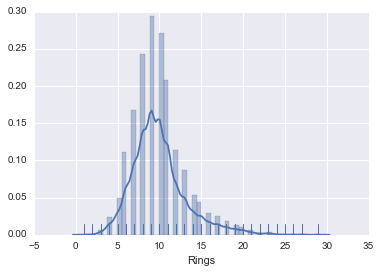

In [23]:
#We will plot univariate distribution for attribute Rings
#seaborn have distplot() for plotting univariate distributions
#Parameters : hist for plotting histogram
#           : kde for plotting the kernel density estimation
#           : rug for plotting ticks for observation values
sns.distplot(abalone_df["Rings"], hist=True, kde=True, rug=True)

### Plotting bivariate distributions : jointplot

#### Scatterplot : Similar to rugplot for univariate distribution

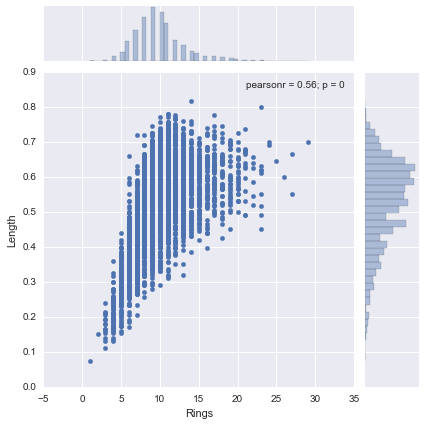

In [35]:
#We will plot bivariate distribution for Rings on x axis vs Length on y axis
#In this plot each dot represents an observation.
sns.jointplot(x="Rings", y="Length", data=abalone_df)

#### Hexbinplot : Similar to histplot for univaraite distribution

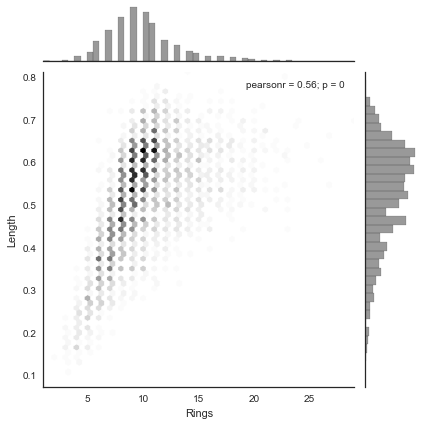

In [47]:
#We will plot bivariate distribution for Rings on x axis vs Length on y axis
#In this plot each hexagonal represents one bin and color intensity represents
#the number of observations in that bin.
#Also this plot looks nice with white background
with sns.axes_style("white"):
    sns.jointplot(x="Rings", y="Length", kind="hex", color="k", data=abalone_df)

#### kdeplot : Similar to kdeplot for univariate distribution

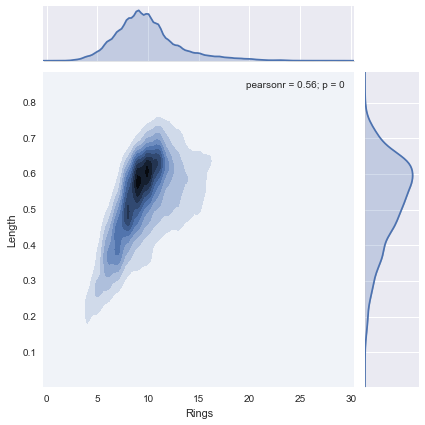

In [40]:
#We will plot bivaraite distribution for Rings on x axis vs Length on y axis
#In this plot each the distribution is represented in forms of contours.
sns.jointplot(x="Rings", y="Length", kind="kde", data=abalone_df)

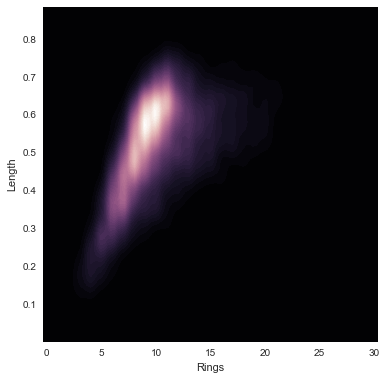

In [44]:
#One can also get bivaraite density more continiously, by increasing the number of contour levels
f, ax = plt.subplots(figsize=(6,6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(abalone_df["Rings"], abalone_df["Length"],  cmap=cmap, n_levels=60, shade=True)

### Plotting pairwise relationships : pairplot

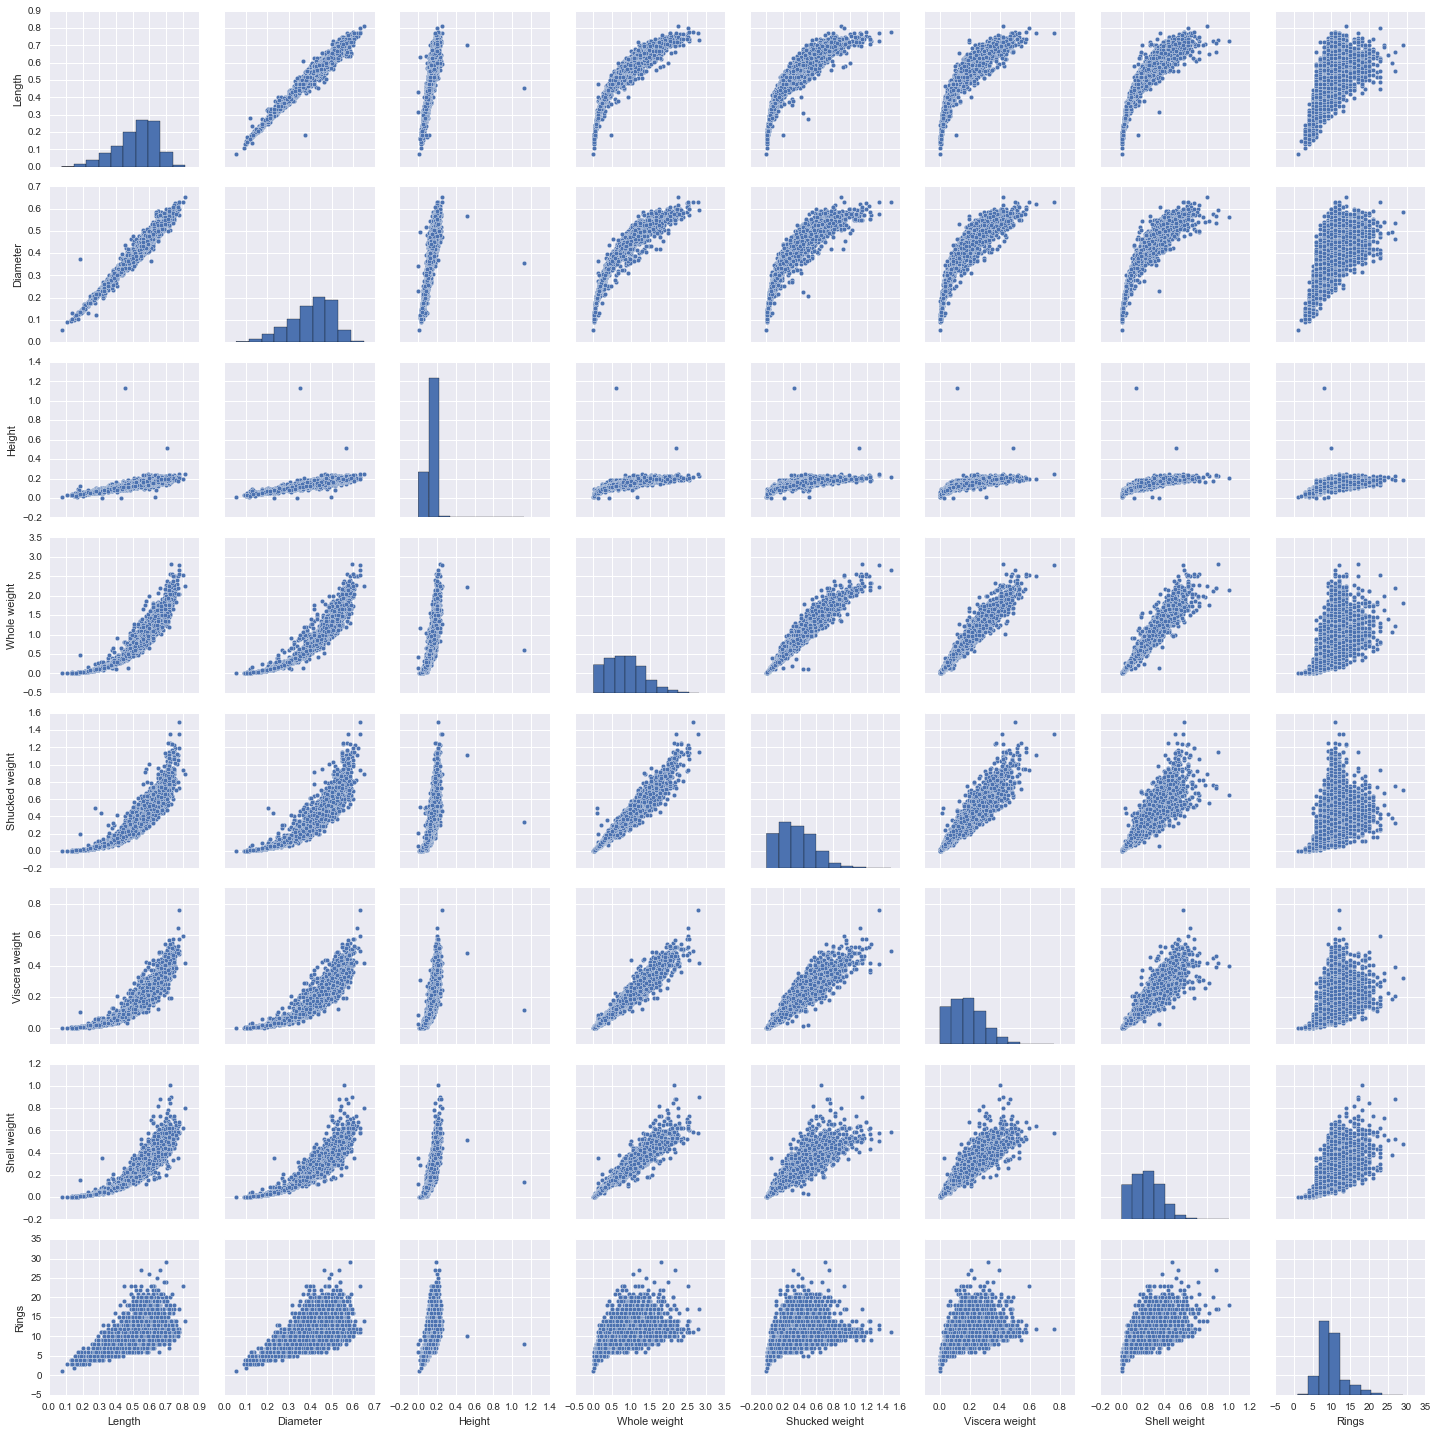

In [49]:
#PairPlots is used to visualize pairwise bivariate distributions of dataset.
#Seaborn is smart enough to leave Sex field for plotting as it is String type
sns.pairplot(abalone_df)

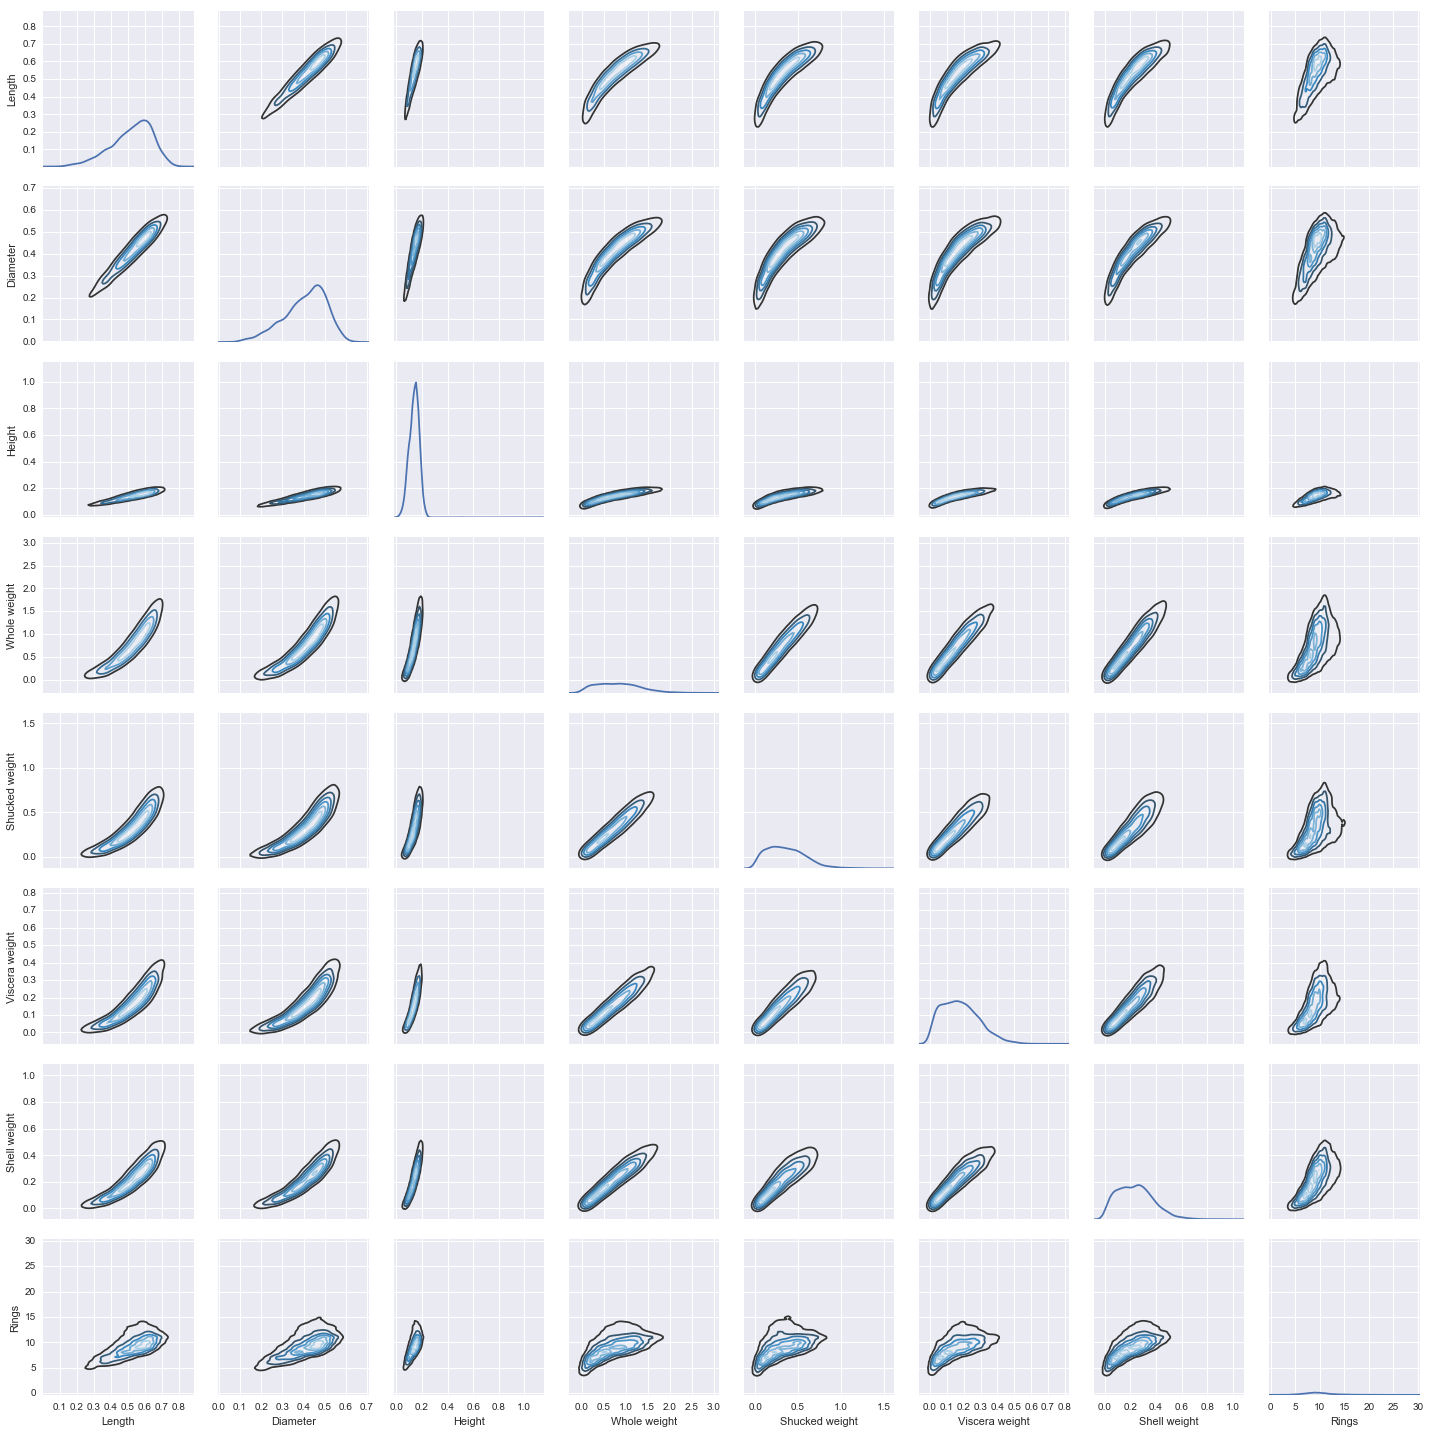

In [50]:
#pairplot returns an object of type PairGrid, one can directly use PairGrid in order to have
#more flexibility in plotting
g = sns.PairGrid(abalone_df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)